In [1]:
import pandas as pd 
import numpy as np
import csv
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt


In [2]:
df= pd.read_csv(r"C:\Users\a3zoo\Downloads\penguins_size.csv")

In [3]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,1,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,1,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,1,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,1,Torgersen,NaN,NaN,NaN,NaN,NaN
4,1,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [5]:
df=df.dropna()
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

C:\Users\a3zoo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='species', ylabel='Density'>

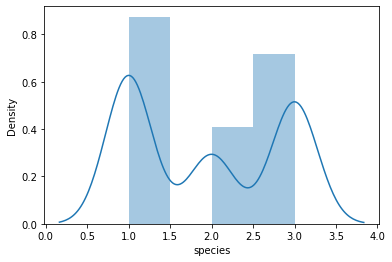

In [6]:
sns.distplot(df['species'])

<AxesSubplot:>

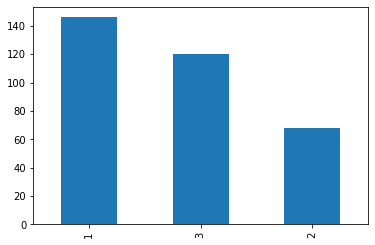

In [7]:
df['species'].value_counts().plot(kind='bar')

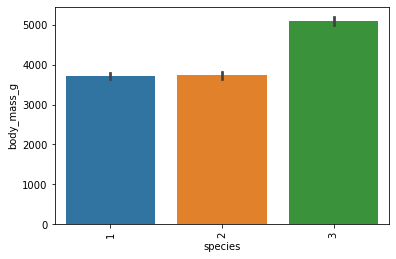

In [8]:
sns.barplot(x=df['species'],y=df['body_mass_g'])
plt.xticks(rotation='vertical')
plt.show()

In [9]:
df.corr()['species']

species              1.000000
culmen_length_mm     0.729262
culmen_depth_mm     -0.740803
flipper_length_mm    0.851351
body_mass_g          0.751020
Name: species, dtype: float64

In [10]:
df['sex'].value_counts()

MALE      169
FEMALE    165
Name: sex, dtype: int64

In [11]:
se=pd.get_dummies(df['sex'],drop_first=True)
se.head()

,MALE
0,1
1,0
2,0
4,0
5,1


In [12]:
isl=pd.get_dummies(df['island'],drop_first=True)
isl.head(5)

,Dream,Torgersen
0,0,1
1,0,1
2,0,1
4,0,1
5,0,1


In [13]:
df=pd.concat([df,se,isl],axis=1)
df.head(5)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,MALE,Dream,Torgersen
0,1,Torgersen,39.1,18.7,181.0,3750.0,MALE,1,0,1
1,1,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,0,0,1
2,1,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,0,0,1
4,1,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,0,0,1
5,1,Torgersen,39.3,20.6,190.0,3650.0,MALE,1,0,1


In [14]:
df.drop(['island','sex'],axis=1,inplace=True)
df.head(5)

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,MALE,Dream,Torgersen
0,1,39.1,18.7,181.0,3750.0,1,0,1
1,1,39.5,17.4,186.0,3800.0,0,0,1
2,1,40.3,18.0,195.0,3250.0,0,0,1
4,1,36.7,19.3,193.0,3450.0,0,0,1
5,1,39.3,20.6,190.0,3650.0,1,0,1


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    int64  
 1   culmen_length_mm   334 non-null    float64
 2   culmen_depth_mm    334 non-null    float64
 3   flipper_length_mm  334 non-null    float64
 4   body_mass_g        334 non-null    float64
 5   MALE               334 non-null    uint8  
 6   Dream              334 non-null    uint8  
 7   Torgersen          334 non-null    uint8  
dtypes: float64(4), int64(1), uint8(3)
memory usage: 16.6 KB


In [16]:
sp= pd.get_dummies(df['species'])
sp.head()

,1,2,3
0,1,0,0
1,1,0,0
2,1,0,0
4,1,0,0
5,1,0,0


In [17]:
df=pd.concat([df,sp],axis=1)
df.head(5)

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,MALE,Dream,Torgersen,1,2,3
0,1,39.1,18.7,181.0,3750.0,1,0,1,1,0,0
1,1,39.5,17.4,186.0,3800.0,0,0,1,1,0,0
2,1,40.3,18.0,195.0,3250.0,0,0,1,1,0,0
4,1,36.7,19.3,193.0,3450.0,0,0,1,1,0,0
5,1,39.3,20.6,190.0,3650.0,1,0,1,1,0,0


In [18]:
df['species'].value_counts()

1    146
3    120
2     68
Name: species, dtype: int64

In [19]:
df=df.drop([1,2,3],axis=1)

In [20]:
df.head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,MALE,Dream,Torgersen
0,1,39.1,18.7,181.0,3750.0,1,0,1
1,1,39.5,17.4,186.0,3800.0,0,0,1
2,1,40.3,18.0,195.0,3250.0,0,0,1
4,1,36.7,19.3,193.0,3450.0,0,0,1
5,1,39.3,20.6,190.0,3650.0,1,0,1


In [21]:
X=df.drop('species',axis=1)
y=df['species']


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [23]:
model = DecisionTreeClassifier()
model = DecisionTreeClassifier()
##model = RandomForestRegressor()

In [24]:
model.fit(X_train,y_train)
pred = model.predict(X_test)
score = accuracy_score(y_test, pred)
score

0.9801980198019802